In [1]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc

In [2]:
path = os.getcwd() + "/new_fft_npa11/"
path

'C:\\Users\\traan\\AIL Beesound Code\\15_8_23/new_fft_npa11/'

In [3]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

C:\Users\traan\AIL Beesound Code\15_8_23/new_fft_npa11//train
C:\Users\traan\AIL Beesound Code\15_8_23/new_fft_npa11//val
C:\Users\traan\AIL Beesound Code\15_8_23/new_fft_npa11//test


In [4]:
def data_loader(path):
    X = []
    y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X += feature.tolist()
            y += [label]*feature.shape[0]
    return X, y

In [5]:

X_train, y_train = data_loader(TRAINING_DIR)
X_val, y_val = data_loader(VALIDATION_DIR)
X_test, y_test = data_loader(TEST_DIR)

In [6]:
print("There are {} training samples and {} training labels".format(len(X_train), len(y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(y_test)))

There are 14000 training samples and 14000 training labels
There are 2000 validation samples and 2000 validation labels
There are 4000 testing samples and 4000 testing labels


In [7]:
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], -1)

X_val = np.array(X_val)
X_val = X_val.reshape(X_val.shape[0], -1)

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], -1)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (14000, 128)
Shape of X_val: (2000, 128)
Shape of X_test: (4000, 128)
Shape of y_train: (14000,)
Shape of y_val: (2000,)
Shape of y_test: (4000,)


In [8]:
X_test = np.vstack((X_test, X_val))
y_test = np.hstack((y_test, y_val))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))


print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (14000, 128)
Shape of X_test: (6000, 128)
Shape of y_train: (14000, 1)
Shape of y_test: (6000, 1)


In [9]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [10]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
np.unique(y_test)

C:\Users\traan\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\traan\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 1])

In [11]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
print(X_train.shape)

(14000, 128)


In [12]:
model = KNeighborsClassifier()

In [13]:
np.random.seed(1337)
t1 = datetime.now()
model.fit(X_train, y_train)
t2 = datetime.now()

In [14]:
training_time = t2 - t1
training_time = int(training_time.total_seconds() / 60)

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [16]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)
print("Classification Report:")
print(classification_report)
print("Training time is: ", training_time)

Accuracy: 0.8881666666666667
Confusion Matrix:
[[2726  274]
 [ 397 2603]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3000
           1       0.90      0.87      0.89      3000

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000

Training time is:  0


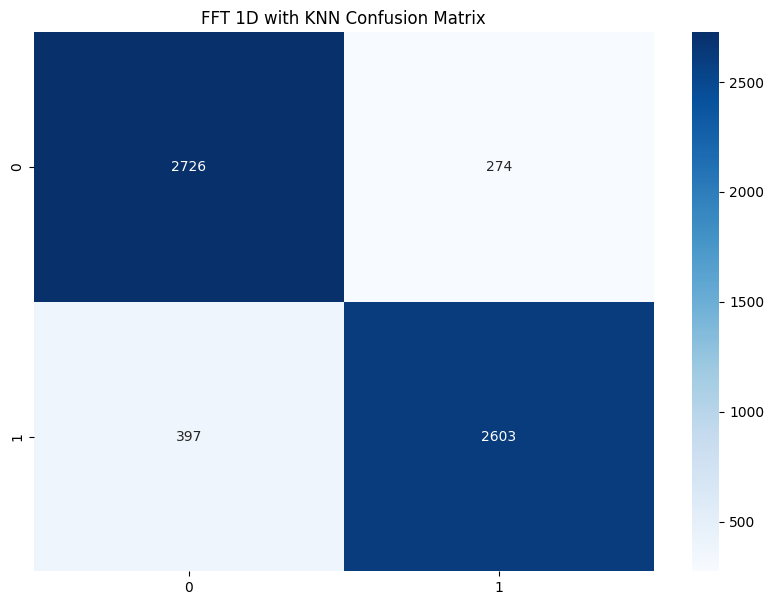

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="")
plt.title("FFT 1D with KNN Confusion Matrix")
plt.savefig("FFT 1D with KNN confusion_matrix.png")
plt.show()


In [76]:
with open("fft_1D_KNNmodel.pkl", "wb") as f:
    pickle.dump(model, f)

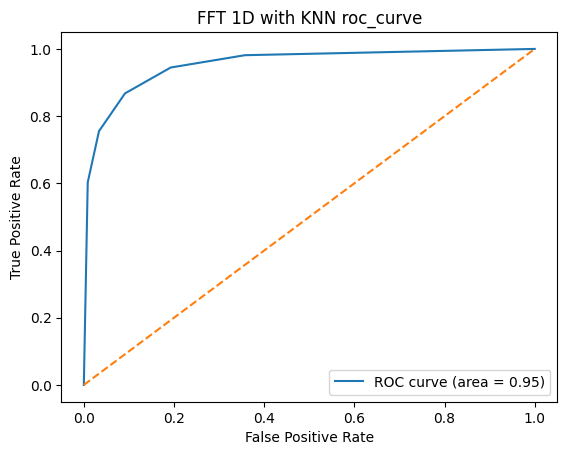

In [18]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate the AUC
auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.title("FFT 1D with KNN roc_curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("FFT 1D CNN roc_curve.png")
plt.show()

<Figure size 640x480 with 0 Axes>